In [26]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Data
HY (https://fred.stlouisfed.org/series/BAMLH0A0HYM2): ICE BofA US High Yield Index Option-Adjusted Spread

IG (https://fred.stlouisfed.org/series/BAMLC0A0CM): ICE BofA US Corporate Index Option-Adjusted Spread

Treasury (https://fred.stlouisfed.org/series/DGS10): Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity, Quoted on an Investment Basis

SPY (https://finance.yahoo.com/quote/SPY/history?p=SPY): SPDR S&P 500 ETF Trust 

<AxesSubplot:>

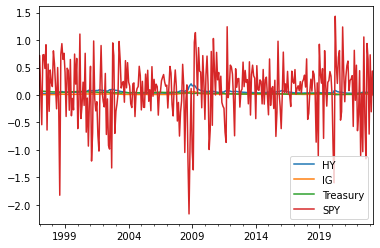

In [27]:
df_HY = pd.read_csv("SAA_data//HY.csv", index_col=0, parse_dates=True)
df_HY.columns = ['HY']
df_HY['HY'] = pd.to_numeric(df_HY['HY'], errors='coerce')
df_HY = df_HY.resample('M').mean() / 100 # Convert Daily Annualized Yield into Monthly Annualized Yield

df_IG = pd.read_csv("SAA_data//IG.csv", index_col=0, parse_dates=True)
df_IG.columns = ['IG']
df_IG['IG'] = pd.to_numeric(df_IG['IG'], errors='coerce')
df_IG = df_IG.resample('M').mean() / 100 # Convert Daily Annualized Yield into Monthly Annualized Yield

df_Treasury = pd.read_csv("SAA_data//Treasury.csv", index_col=0, parse_dates=True)
df_Treasury.columns = ['Treasury']
df_Treasury['Treasury'] = pd.to_numeric(df_Treasury['Treasury'], errors='coerce')
df_Treasury = df_Treasury.resample('M').mean() / 100 # Convert Daily Annualized Yield into Monthly Annualized Yield

df_SPY = pd.read_csv("SAA_data//SPY.csv", index_col=0, parse_dates=True)[['Adj Close']]
df_SPY.columns = ['SPY']
df_SPY = df_SPY.resample("M").last().pct_change().dropna() # Monthly Return
df_SPY = (1 + df_SPY) ** 12 - 1 # Annualize Monthly Return
df_SPY = np.log(1 + df_SPY) # Convert Into Log Return
df = pd.concat([df_HY, df_IG, df_Treasury, df_SPY], axis=1).dropna()

df.plot()

<AxesSubplot:>

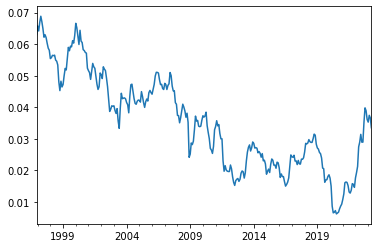

In [28]:
df['Treasury'].plot()

<AxesSubplot:>

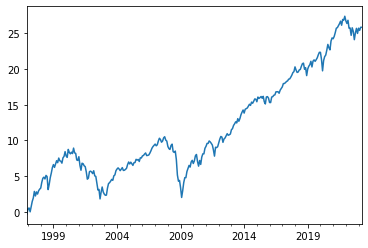

In [29]:
df['SPY'].cumsum().plot()

<AxesSubplot:>

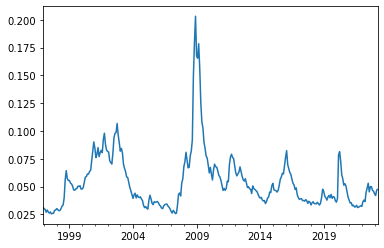

In [30]:
df['HY'].plot()

<AxesSubplot:>

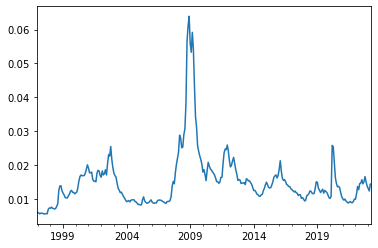

In [31]:
df['IG'].plot()

In [32]:
R_TS_1y = df.rolling(window=12).corr().dropna()
R_TS_3y = df.rolling(window=36).corr().dropna()
R_TS_10y = df.rolling(window=120).corr().dropna()

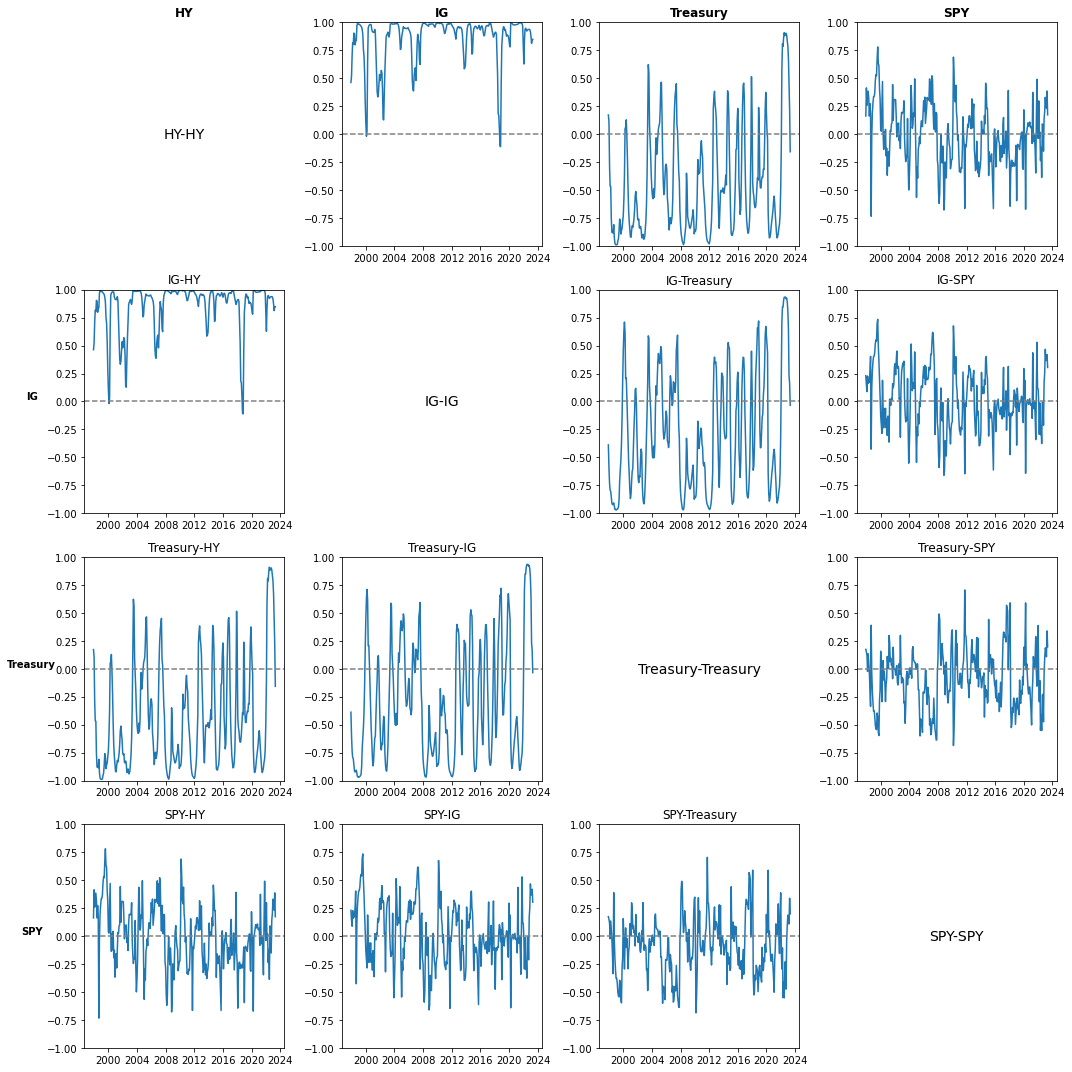

In [33]:
'''
Rolling Window 1Y
'''
# Get the column combinations
columns = df.columns

# Calculate the number of columns and rows for the plot grid
n = len(columns)
fig, axes = plt.subplots(n, n, figsize=(15, 15))

# Create the plot grid
for i, row in enumerate(columns):
    for j, col in enumerate(columns):
        if i == j:
            axes[i, j].text(0.5, 0.5, f"{row}-{col}", ha='center', va='center', fontsize=14)
            axes[i, j].set_axis_off()
        else:
            axes[i, j].plot(R_TS_1y.xs(key=(row), level=(1), axis=0)[[col]])
            axes[i, j].set_title(f"{row}-{col}")
            axes[i, j].set_ylim(-1, 1)
            axes[i, j].axhline(0, color='gray', linestyle='--')

# Set the x-axis and y-axis labels
for ax, col in zip(axes[0], columns):
    ax.set_title(col, fontweight='bold')

for ax, row in zip(axes[:, 0], columns):
    ax.set_ylabel(row, rotation=0, fontweight='bold', labelpad=15)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

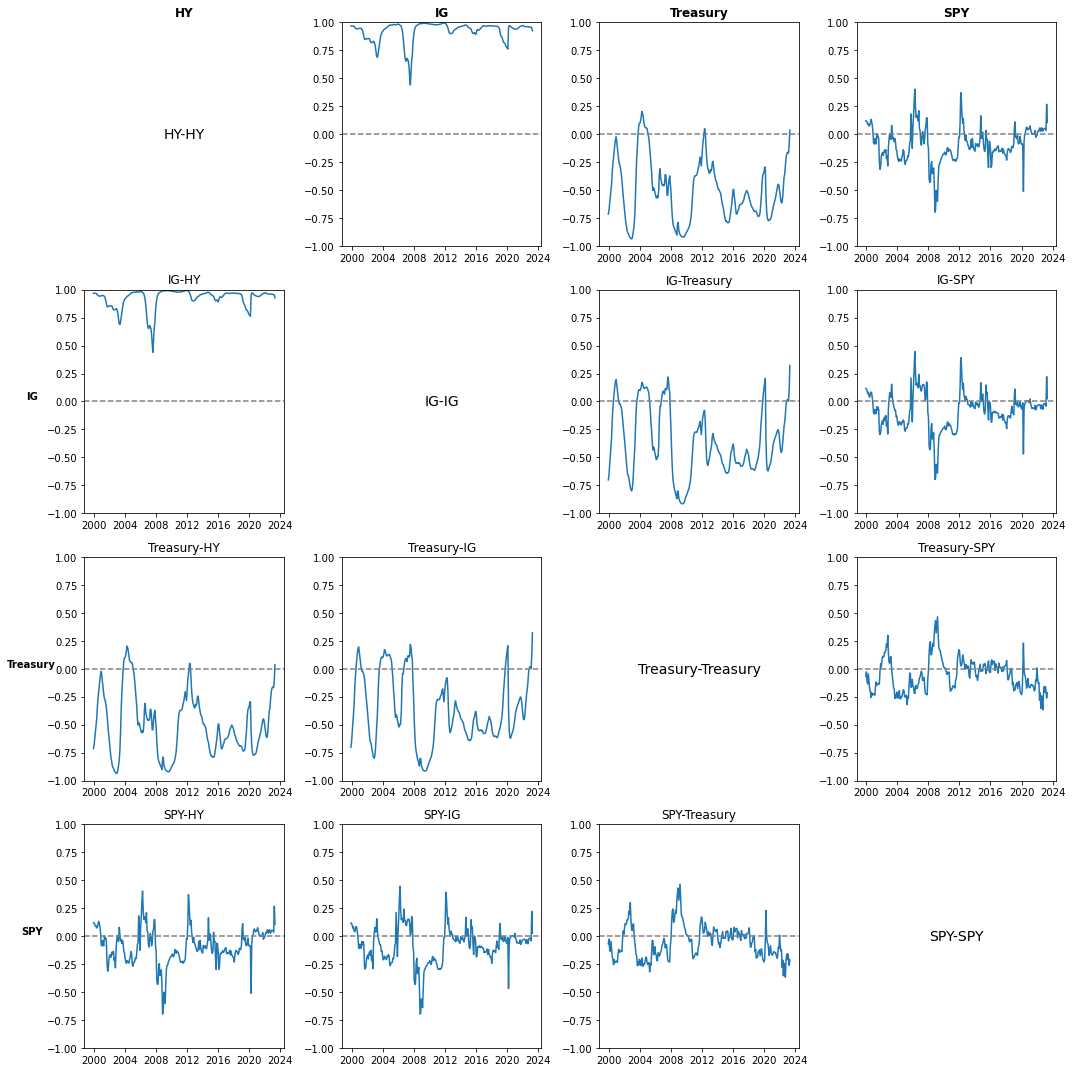

In [34]:
'''
Rolling Window 3Y
'''
# Get the column combinations
columns = df.columns

# Calculate the number of columns and rows for the plot grid
n = len(columns)
fig, axes = plt.subplots(n, n, figsize=(15, 15))

# Create the plot grid
for i, row in enumerate(columns):
    for j, col in enumerate(columns):
        if i == j:
            axes[i, j].text(0.5, 0.5, f"{row}-{col}", ha='center', va='center', fontsize=14)
            axes[i, j].set_axis_off()
        else:
            axes[i, j].plot(R_TS_3y.xs(key=(row), level=(1), axis=0)[[col]])
            axes[i, j].set_title(f"{row}-{col}")
            axes[i, j].set_ylim(-1, 1)
            axes[i, j].axhline(0, color='gray', linestyle='--')

# Set the x-axis and y-axis labels
for ax, col in zip(axes[0], columns):
    ax.set_title(col, fontweight='bold')

for ax, row in zip(axes[:, 0], columns):
    ax.set_ylabel(row, rotation=0, fontweight='bold', labelpad=15)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

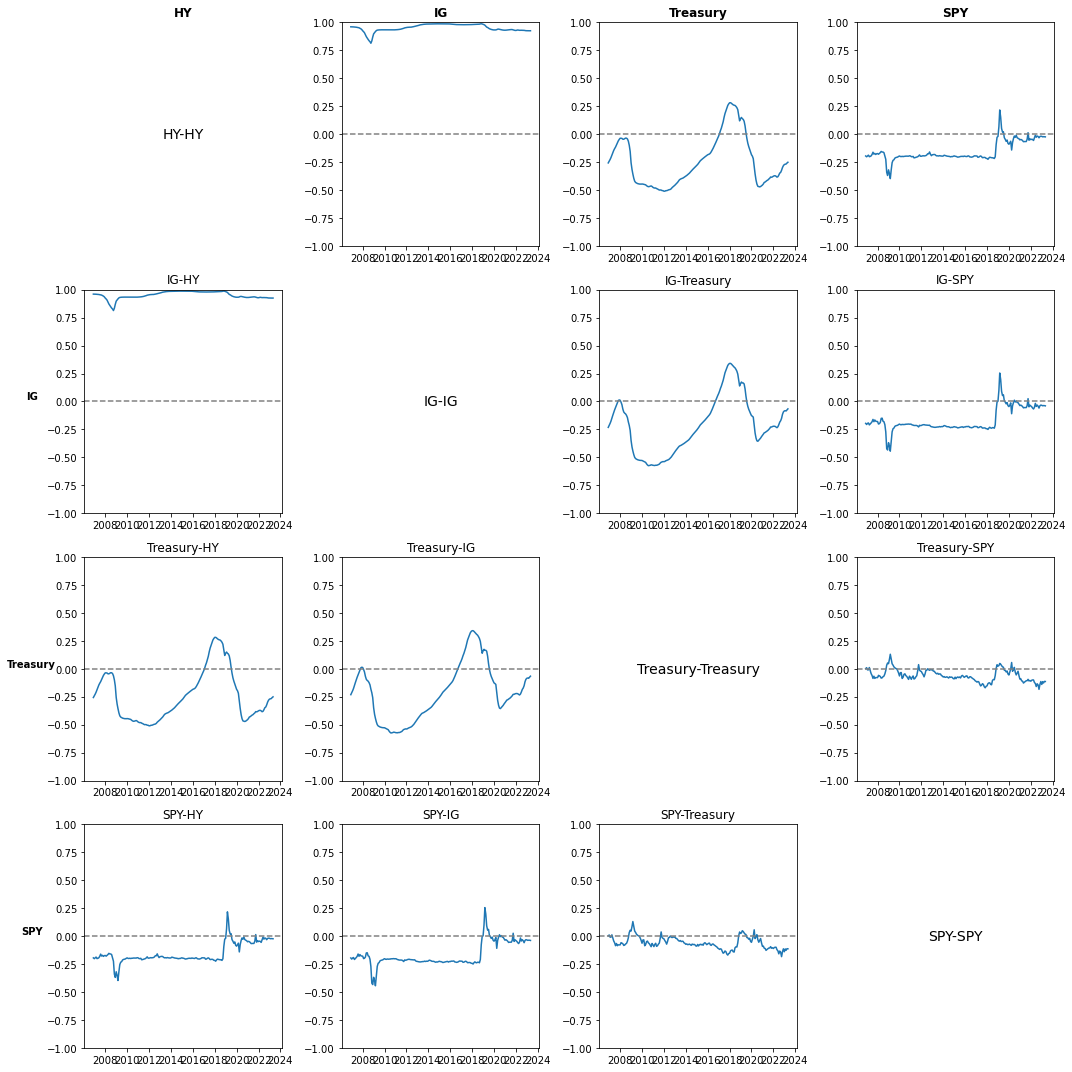

In [35]:
'''
Rolling Window 10Y
'''
# Get the column combinations
columns = df.columns

# Calculate the number of columns and rows for the plot grid
n = len(columns)
fig, axes = plt.subplots(n, n, figsize=(15, 15))

# Create the plot grid
for i, row in enumerate(columns):
    for j, col in enumerate(columns):
        if i == j:
            axes[i, j].text(0.5, 0.5, f"{row}-{col}", ha='center', va='center', fontsize=14)
            axes[i, j].set_axis_off()
        else:
            axes[i, j].plot(R_TS_10y.xs(key=(row), level=(1), axis=0)[[col]])
            axes[i, j].set_title(f"{row}-{col}")
            axes[i, j].set_ylim(-1, 1)
            axes[i, j].axhline(0, color='gray', linestyle='--')

# Set the x-axis and y-axis labels
for ax, col in zip(axes[0], columns):
    ax.set_title(col, fontweight='bold')

for ax, row in zip(axes[:, 0], columns):
    ax.set_ylabel(row, rotation=0, fontweight='bold', labelpad=15)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

## SPY-Treasury
The correlation between the return on the SPDR S&P 500 ETF (SPY) and Treasury yields can vary depending on various factors, including economic conditions, market sentiment, and other macroeconomic factors.

Typically, there is an inverse relationship between Treasury yields and stock market returns. When Treasury yields rise, it tends to put downward pressure on stock prices as investors shift their focus to the relatively safer fixed-income investments. Conversely, when Treasury yields fall, it tends to push up stock prices as investors look for better returns.

However, it's important to note that this correlation is not always consistent and can vary depending on the specific economic conditions and other factors affecting the markets. For example, in times of economic growth and high market optimism, both Treasury yields and stock prices can rise simultaneously. For example, SPY and Treasury yield are positively correlated after Dot-Com bubble and GFC.

Overall, while there is a general inverse correlation between Treasury yields and stock market returns, it's important to analyze the specific factors driving the markets and economic conditions to gain a deeper understanding of the relationship between these two variables.

## IG/HY - SPY
In general, when corporate bond yields rise, it can signal an increase in the perceived risk of investing in corporate debt, which may lead investors to demand a higher return on their investment to compensate for the increased risk. This can also cause borrowing costs for corporations to increase, which may negatively impact their profitability and stock prices.

In contrast, when corporate bond yields decline, it can signal a decrease in perceived risk and may lead investors to accept lower yields on their investments. This may also lead to lower borrowing costs for corporations, which can positively impact their profitability and stock prices.

As a result, there may be a negative correlation between the return on the SPY and corporate bond yields, as rising bond yields may signal higher risk and negatively impact stock prices, while falling bond yields may signal lower risk and positively impact stock prices. However, it is important to note that this correlation may not always hold true, as there can be many other factors influencing the performance of the stock market and corporate bonds.

## IG/HY - Treasury
It is quite surprising that IG/HY has negative correlation with Treasury yield over the past two decades. Economic conditions can affect both Treasury yields and high-yield bond yields. During a period of economic growth, investors may be more willing to take on risk, leading to higher demand for high-yield bonds and lower demand for Treasuries. Conversely, during a recession or downturn, investors may be more risk-averse and favor the safety of Treasuries over high-yield bonds.

## IG vs HY
To explore this pair of correlation across time, we introduce DCC estimator.

In [36]:
'''
    Dymanic Conditional Correlation
    Ref with modification: https://github.com/srivastavaprashant/mgarch/blob/master/mgarch/mgarch.py
'''

from statsmodels.tsa.stattools import adfuller
from scipy.optimize import minimize
import mgarch
import pandas as pd
import numpy as np

def test_stationarity(time_series, significance_level=0.05):
    result = adfuller(time_series)
    print('ADF Statistic: {:.4f}'.format(result[0]))
    print('p-value: {:.4f}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {:.4f}'.format(key, value))

    if result[1] < significance_level:
        print("The time series is stationary. Significance: {}".format(significance_level))
    else:
        print("The time series is not stationary. Significance: {}".format(significance_level))

In [37]:
   def mgarch_loglike(params, D_t, rt):
        T, N = rt.shape
        
        # No of assets
        a = params[0]
        b = params[1]
        Q_bar = np.cov(rt.reshape(N, T))

        Q_t = np.zeros((T,N,N))
        R_t = np.zeros((T,N,N))
        H_t = np.zeros((T,N,N))
        
        Q_t[0] = np.matmul(rt[0].T/2, rt[0]/2)

        loglike = 0
        for i in range(1,T):
            dts = np.diag(D_t[i])
            dtinv = np.linalg.inv(dts)
            et = dtinv*rt[i].T
            Q_t[i] = (1-a-b)*Q_bar + a*(et*et.T) + b*Q_t[i-1]
            qts = np.linalg.inv(np.sqrt(np.diag(np.diag(Q_t[i]))))

            R_t[i] = np.matmul(qts, np.matmul(Q_t[i], qts))


            H_t[i] = np.matmul(dts, np.matmul(R_t[i], dts))   

            loglike = loglike + N*np.log(2*np.pi) + \
                      2*np.log(D_t[i].sum()) + \
                      np.log(np.linalg.det(R_t[i])) + \
                      np.matmul(rt[i], (np.matmul( np.linalg.inv(H_t[i]), rt[i].T)))


        return loglike[0,0]

In [38]:
test_stationarity(df['HY'])

ADF Statistic: -3.1975
p-value: 0.0201
Critical Values:
	1%: -3.4516
	5%: -2.8709
	10%: -2.5718
The time series is stationary. Significance: 0.05


In [39]:
test_stationarity(df['IG'])

ADF Statistic: -3.5749
p-value: 0.0063
Critical Values:
	1%: -3.4513
	5%: -2.8708
	10%: -2.5717
The time series is stationary. Significance: 0.05


In [40]:
df = df[['IG', 'HY']]
model = mgarch.mgarch()
rt = np.matrix(df)
T, N = rt.shape
D_t = np.zeros((T, N))

mean = rt.mean(axis=0)
rt = rt - mean

for i in range(N):
    params = model.garch_fit(rt[:,i])
    D_t[:,i] = np.sqrt(model.garch_var(params, rt[:,i]))

res = minimize(mgarch_loglike, (0.01, 0.99), 
               args = (D_t, rt), 
               bounds = ((0.01, 0.99), (0.01, 0.99)), 
               constraints = [{'type':'ineq', 'fun': lambda arr: 1 - arr[0] - arr[1]}],
               options = {'maxiter':10000000, 'disp':True},
            )

a, b = res.x
Q_bar = np.cov(rt.reshape(N, T))

Q_t = np.zeros((T,N,N))
R_t = np.zeros((T,N,N))
H_t = np.zeros((T,N,N))

Q_t[0] = np.matmul(rt[0].T/2, rt[0]/2)

loglike = 0
for i in range(1,T):
    dts = np.diag(D_t[i])
    dtinv = np.linalg.inv(dts)
    et = dtinv*rt[i].T
    Q_t[i] = (1-a-b)*Q_bar + a*(et*et.T) + b*Q_t[i-1]
    qts = np.linalg.inv(np.sqrt(np.diag(np.diag(Q_t[i]))))
    R_t[i] = np.matmul(qts, np.matmul(Q_t[i], qts))
    H_t[i] = np.matmul(dts, np.matmul(R_t[i], dts)) 

Optimization terminated successfully    (Exit mode 0)
            Current function value: -1334.8425004805958
            Iterations: 10
            Function evaluations: 37
            Gradient evaluations: 10


<AxesSubplot:>

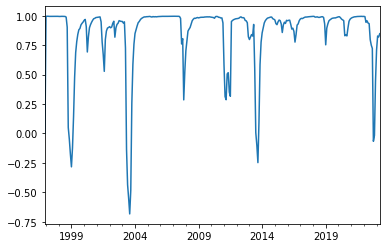

In [41]:
pd.Series(R_t[:, 0, 1], index=df.index).plot()

The correlation between **High Yield (HY)** bond yields and **Investment Grade (IG)** bond yields in the US market is generally **quite strong**, with a correlation coefficient approaching 1. This indicates that the two asset classes typically move in tandem. However, the nature of HY bonds is more similar to equities, given their higher risk and return characteristics. In periods of economic distress or heightened uncertainty, HY bond investors may withdraw their funds and opt for the relative safety of IG bonds, causing a deviation in this otherwise strong correlation. There are other reasons causing the divergence as well.

**According to the DCC estimator and 1y rolling estimator**, we can find that during the years 1999, 2003-2004, 2008, 2014, and 2022, there were instances where the correlation between HY and IG bond yields weakened or even turned negative. These periods were characterized by various factors that may have contributed to the change in correlation:

**1999**: The dot-com bubble began to form in this period, with technology stocks experiencing rapid price appreciation. Investors may have shifted funds from riskier HY bonds to safer IG bonds or into booming technology stocks, causing a divergence in yields. 


**2003-2004**: The US economy was recovering from the dot-com bubble and the 9/11 terrorist attacks. The Federal Reserve implemented a series of interest rate cuts to stimulate the economy, potentially leading to a disparity between HY and IG bond yields as investors sought higher returns in HY bonds while maintaining their IG bond allocations. 


**2008**: The Global Financial Crisis caused a massive flight to safety, with investors fleeing riskier assets such as HY bonds and equities. The demand for safe-haven IG bonds increased, driving down their yields and causing a divergence from HY bond yields. 


**2014**: The collapse in oil prices led to concerns about the creditworthiness of energy companies, many of which were HY bond issuers. This caused a sell-off in HY bonds as investors sought to avoid potential defaults, while IG bond yields remained relatively stable. 


**2022**: The COVID-19 pandemic and its lingering effects, along with geopolitical tensions and rising inflation, created an uncertain economic environment. Investors may have sought refuge in IG bonds, driving down their yields, while reducing exposure to riskier HY bonds, leading to a change in the correlation between the two asset classes.